<a href="https://colab.research.google.com/github/j23-cs167/project-2-gtownsendp/blob/main/Project2_Townsend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Gabi Townsend \\
Proposed Grade: 25/25

**State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict.** \\
This data is the Raisin Dataset from the UC Irvine Machine Learning webpage. It classifies two types of raisins, Kecimen and Besni, by their area, length, exentricity, extent, and perimeter. \\
I am trying to to find which machine learning model is the best at predicting the correct type of raisin. I am also trying to predict which predictor variable has the most impact in which class of raisin it is. 




In [13]:
from google.colab import drive
import pandas as pd
import sklearn 
import numpy
import matplotlib.pyplot as plt 
from sklearn import metrics 
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/CS 167/Raisin.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


**Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?** \\
The data was in pretty good shape. I ran code to see if there was any NA values and since there was not, I did not have to drop or add anything to the dataset. I did not have to use dummy variable because the only thing not in numbers and that is my target variable so I do not want to use dummy variables on that. I did normalize the data because the numbers ranges are in 1000s, 100s, and decimals. Due to this, I can assume that the best results will come from normalization. I am certain that the data is clean because I ran code to ensure there was no missing values, I checked to make sure my normalization was successful, and I can visually check and see that all predictor columns are in numbers. 

In [3]:
data.isna().any()

Area               False
MajorAxisLength    False
MinorAxisLength    False
Eccentricity       False
ConvexArea         False
Extent             False
Perimeter          False
Class              False
dtype: bool

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
predictor = data.columns.drop('Class')
target = 'Class'
train_data, test_data, train_sln, test_sln = train_test_split(data[predictor], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

0.5055555555555555


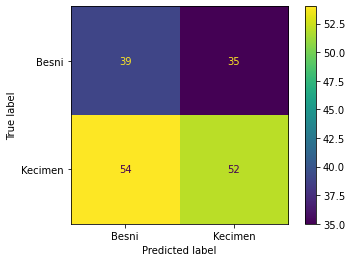

In [139]:
#Baseline Accuracy and Confusion Matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dummy_clf = DummyClassifier(strategy='uniform') #make random guesses
dummy_clf.fit(train_data_normalized, train_sln)
preds = dummy_clf.predict(test_data_normalized)

baseline =metrics.accuracy_score(test_sln, preds)
print(baseline)
vals = data[target].unique() 
conf_mat = metrics.confusion_matrix(test_sln, preds, labels=vals)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=dummy_clf.classes_)
disp.plot()
plt.show()


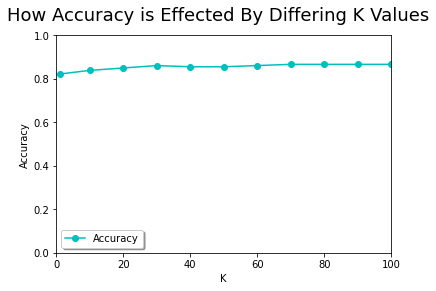

In [34]:
#UnWeighted KNN
k_vals = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
kNN_accuracies = []
for n_neighbors in k_vals:
    KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights = "uniform")
    KNN.fit(train_data_normalized, train_sln)
    KNNPred = KNN.predict(test_data_normalized)
    KAccuracy = sklearn.metrics.accuracy_score(KNNPred, test_sln)
    kNN_accuracies.append(KAccuracy)


plt.suptitle('How Accuracy is Effected By Differing K Values',fontsize=18)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(k_vals,kNN_accuracies,'co-',label='Accuracy')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,100,0, 1])

plt.show()

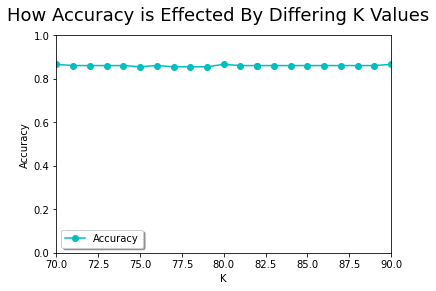

In [35]:
k_vals = [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 82, 83, 84, 85, 86, 87, 88, 89, 90]
kNN_accuracies = []
for n_neighbors in k_vals:
    KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights = "uniform")
    KNN.fit(train_data_normalized, train_sln)
    KNNPred = KNN.predict(test_data_normalized)
    KAccuracy = sklearn.metrics.accuracy_score(KNNPred, test_sln)
    kNN_accuracies.append(KAccuracy)


plt.suptitle('How Accuracy is Effected By Differing K Values',fontsize=18)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(k_vals,kNN_accuracies,'co-',label='Accuracy')
plt.legend(loc='lower left', shadow=True)
plt.axis([70,90,0, 1])

plt.show()

0.8666666666666667


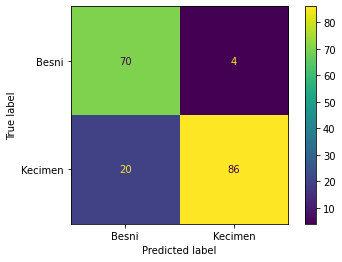

In [63]:
KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=80, weights = "uniform")
KNN.fit(train_data_normalized, train_sln)
KNNPred = KNN.predict(test_data_normalized)
KNNaccuracy=sklearn.metrics.accuracy_score(KNNPred, test_sln)
print(KNNaccuracy)

from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dummy_clf = DummyClassifier(strategy='uniform') 
dummy_clf.fit(train_data_normalized, train_sln)
preds = dummy_clf.predict(test_data_normalized)

vals = data[target].unique() 
conf_mat = metrics.confusion_matrix(test_sln, KNNPred, labels=vals)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=KNN.classes_)
disp.plot()
plt.show()

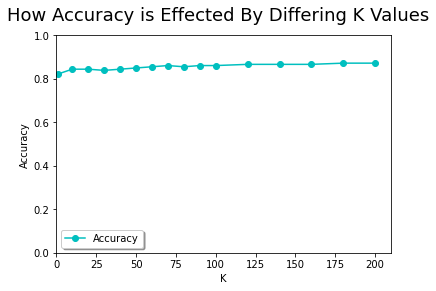

In [66]:
#Weighted KNN
k_vals = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]
wkNN_accuracies = []
for n_neighbors in k_vals:
    wKNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights = "distance")
    wKNN.fit(train_data_normalized, train_sln)
    wKNNPred = wKNN.predict(test_data_normalized)
    wKAccuracy = sklearn.metrics.accuracy_score(wKNNPred, test_sln)
    wkNN_accuracies.append(wKAccuracy)


plt.suptitle('How Accuracy is Effected By Differing K Values',fontsize=18)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(k_vals,wkNN_accuracies,'co-',label='Accuracy')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,210,0, 1])

plt.show()

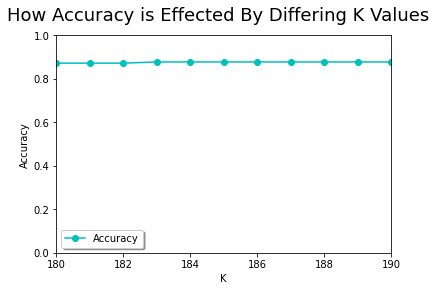

In [67]:
k_vals = [180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190]
wkNN_accuracies = []
for n_neighbors in k_vals:
    wKNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights = "distance")
    wKNN.fit(train_data_normalized, train_sln)
    wKNNPred = wKNN.predict(test_data_normalized)
    wKAccuracy = sklearn.metrics.accuracy_score(wKNNPred, test_sln)
    wkNN_accuracies.append(wKAccuracy)


plt.suptitle('How Accuracy is Effected By Differing K Values',fontsize=18)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(k_vals,wkNN_accuracies,'co-',label='Accuracy')
plt.legend(loc='lower left', shadow=True)
plt.axis([180,190,0, 1])

plt.show()

0.8777777777777778


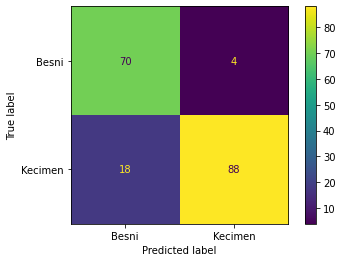

In [68]:
wKNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=185, weights = "distance")
wKNN.fit(train_data_normalized, train_sln)
wKNNPred = KNN.predict(test_data_normalized)
wKNNaccuracy = sklearn.metrics.accuracy_score(wKNNPred, test_sln)
print (wKNNaccuracy)
vals = data[target].unique() 
conf_mat = metrics.confusion_matrix(test_sln, wKNNPred, labels=vals)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=wKNN.classes_)
disp.plot()
plt.show()

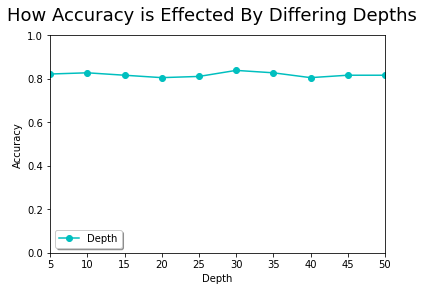

In [55]:
#Decision Tree
from sklearn import tree 
depth = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
dtr_accuracies = []
for current_max_depth in depth:
  dtrs = tree.DecisionTreeClassifier(max_depth=current_max_depth)
  dtrs.fit(train_data_normalized, train_sln)
  treepred=dtrs.predict(test_data_normalized)
  treeaccuracy=metrics.accuracy_score(treepred, test_sln)
  dtr_accuracies.append(treeaccuracy)


plt.suptitle('How Accuracy is Effected By Differing Depths',fontsize=18)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depth, dtr_accuracies,'co-',label='Depth')
plt.legend(loc='lower left', shadow=True)
plt.axis([5,50,0,1])

plt.show()

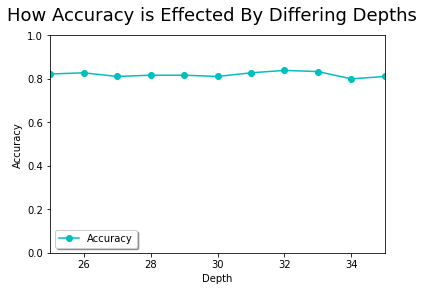

In [83]:
from sklearn import tree 
depth = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
dtr_accuracies = []
for current_max_depth in depth:
  dtrs = tree.DecisionTreeClassifier(max_depth=current_max_depth)
  dtrs.fit(train_data_normalized, train_sln)
  treepred=dtrs.predict(test_data_normalized)
  treeaccuracy=metrics.accuracy_score(treepred, test_sln)
  dtr_accuracies.append(treeaccuracy)


plt.suptitle('How Accuracy is Effected By Differing Depths',fontsize=18)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depth, dtr_accuracies,'co-',label='Accuracy')
plt.legend(loc='lower left', shadow=True)
plt.axis([25,35,0,1])

plt.show()

0.8166666666666667


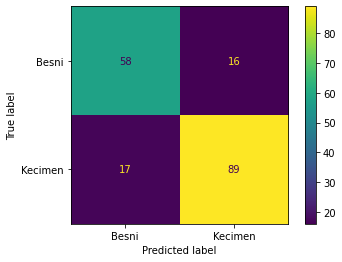

In [80]:
dtrs = tree.DecisionTreeClassifier(max_depth=27)
dtrs.fit(train_data_normalized, train_sln)
treepred=dtrs.predict(test_data_normalized)
treeaccuracy = metrics.accuracy_score(treepred, test_sln)
print(treeaccuracy)

vals = data[target].unique() 
conf_mat = metrics.confusion_matrix(test_sln, treepred, labels=vals)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=dtrs.classes_)
disp.plot()
plt.show()

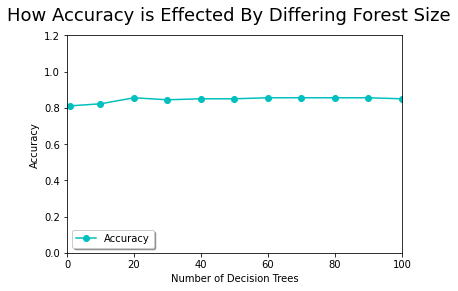

In [90]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
t = [ 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
forest_accuracies = []
for currentestimators in t:
  forest = RandomForestClassifier(n_estimators=currentestimators, random_state = 0)
  forest.fit(train_data_normalized,train_sln)
  fpredictions = forest.predict(test_data_normalized)
  forestaccuracy=metrics.accuracy_score(fpredictions, test_sln)
  forest_accuracies.append(forestaccuracy)


plt.suptitle('How Accuracy is Effected By Differing Forest Size',fontsize=18)
plt.xlabel('Number of Decision Trees')
plt.ylabel('Accuracy')
plt.plot(t,forest_accuracies,'co-',label='Accuracy')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,100,0,1.2])

plt.show()

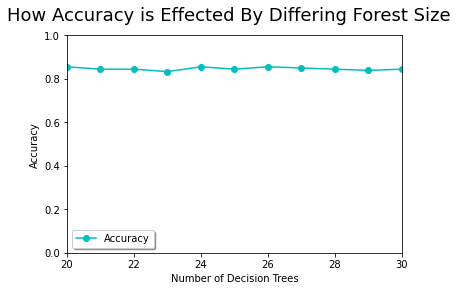

In [91]:
from sklearn.ensemble import RandomForestClassifier
t = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
forest_accuracies = []
for currentestimators in t:
  forest = RandomForestClassifier(n_estimators=currentestimators, random_state = 0)
  forest.fit(train_data_normalized,train_sln)
  fpredictions = forest.predict(test_data_normalized)
  forestaccuracy=metrics.accuracy_score(fpredictions, test_sln)
  forest_accuracies.append(forestaccuracy)


plt.suptitle('How Accuracy is Effected By Differing Forest Size',fontsize=18)
plt.xlabel('Number of Decision Trees')
plt.ylabel('Accuracy')
plt.plot(t,forest_accuracies,'co-',label='Accuracy')
plt.legend(loc='lower left', shadow=True)
plt.axis([20,30,0,1])

plt.show()

0.8555555555555555


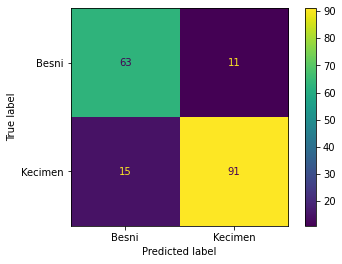

In [92]:
forest = RandomForestClassifier(n_estimators=24, random_state = 0)
forest.fit(train_data_normalized,train_sln)
fpredictions = forest.predict(test_data_normalized)
forestaccuracy=metrics.accuracy_score(fpredictions, test_sln)
print(forestaccuracy)

vals = data[target].unique() 
conf_mat = metrics.confusion_matrix(test_sln, fpredictions, labels=vals)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=forest.classes_)
disp.plot()
plt.show()

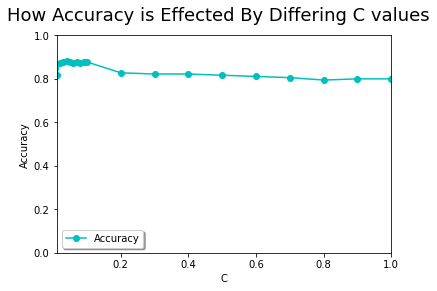

In [125]:
#SVC
from sklearn.svm import SVC
c = [.01, .02, .03, .04, .05, .06, .07, .08, .09, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
SVC_accuracies = []

for estimators in c:
  SV = SVC(kernel = 'sigmoid', C=estimators)
  SV.fit(train_data_normalized,train_sln)
  SVCpredictions = SV.predict(test_data_normalized)
  SVCaccuracy=metrics.accuracy_score(SVCpredictions, test_sln)
  SVC_accuracies.append(SVCaccuracy)

plt.suptitle('How Accuracy is Effected By Differing C values',fontsize=18)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.plot(c,SVC_accuracies,'co-',label='Accuracy')
plt.legend(loc='lower left', shadow=True)
plt.axis([.01,1,0,1])

plt.show()

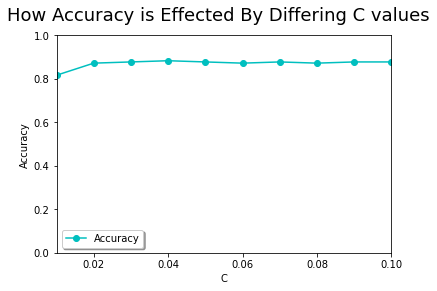

In [126]:
from sklearn.svm import SVC
c = [.01, .02, .03, .04, .05, .06, .07, .08, .09, .1]
SVC_accuracies = []

for estimators in c:
  SV = SVC(kernel = 'sigmoid', C=estimators)
  SV.fit(train_data_normalized,train_sln)
  SVCpredictions = SV.predict(test_data_normalized)
  SVCaccuracy=metrics.accuracy_score(SVCpredictions, test_sln)
  SVC_accuracies.append(SVCaccuracy)

plt.suptitle('How Accuracy is Effected By Differing C values',fontsize=18)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.plot(c,SVC_accuracies,'co-',label='Accuracy')
plt.legend(loc='lower left', shadow=True)
plt.axis([.01,.1,0,1])

plt.show()

0.8777777777777778


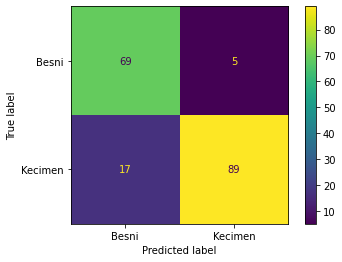

In [130]:
clf = SVC(kernel = 'sigmoid', C=.09)
clf.fit(train_data_normalized,train_sln)
predictions = clf.predict(test_data_normalized)
SVCaccuracy = metrics.accuracy_score(predictions, test_sln)
print(SVCaccuracy)

vals = data[target].unique() 
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=clf.classes_)
disp.plot()
plt.show()

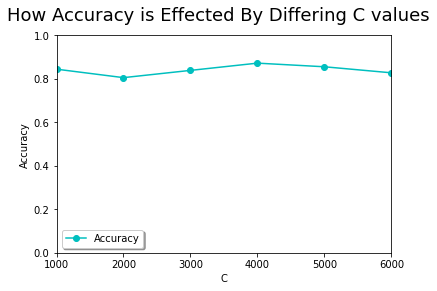

In [146]:
from sklearn.linear_model import SGDClassifier
iter = [1000, 2000, 3000, 4000, 5000, 6000]
SGD_accuracies = []

for estimators in iter:
  SGD = SGDClassifier(max_iter=estimators)
  SGD.fit(train_data_normalized,train_sln)
  SGD_predictions = SGD.predict(test_data_normalized)
  SGD_score = metrics.accuracy_score(test_sln, SGD_predictions)
  SGD_accuracies.append(SGD_score)

plt.suptitle('How Accuracy is Effected By Differing C values',fontsize=18)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.plot(iter,SGD_accuracies,'co-',label='Accuracy')
plt.legend(loc='lower left', shadow=True)
plt.axis([1000,6000,0,1])

plt.show()

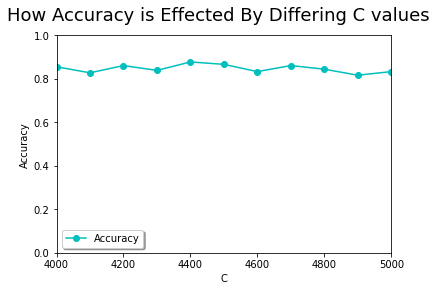

In [168]:
from sklearn.linear_model import SGDClassifier
iter = [4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000]
SGD_accuracies = []

for estimators in iter:
  SGD = SGDClassifier(max_iter=estimators)
  SGD.fit(train_data_normalized,train_sln)
  SGD_predictions = SGD.predict(test_data_normalized)
  SGD_score = metrics.accuracy_score(test_sln, SGD_predictions)
  SGD_accuracies.append(SGD_score)

plt.suptitle('How Accuracy is Effected By Differing C values',fontsize=18)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.plot(iter,SGD_accuracies,'co-',label='Accuracy')
plt.legend(loc='lower left', shadow=True)
plt.axis([4000,5000,0,1])

plt.show()

0.8611111111111112


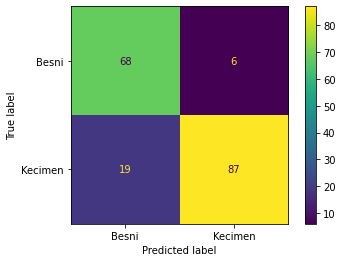

In [183]:
SGD = SGDClassifier(max_iter=4400)
SGD.fit(train_data_normalized,train_sln)
SGD_predictions = SGD.predict(test_data_normalized)
SGDaccuracy = metrics.accuracy_score(test_sln, SGD_predictions)
print(SGDaccuracy)
vals = data[target].unique() 
conf_mat = metrics.confusion_matrix(test_sln, SGD_predictions, labels=vals)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=SGD.classes_)
disp.plot()
plt.show()

In [196]:
print("Summary: ", "\n",
      "Baseline: ", baseline, "\n",
      "Unweighted KNN: ", KNNaccuracy, "\n",
      "Weighted KNN: ",  wKNNaccuracy, "\n",
      "Decision Tree: ", treeaccuracy, "\n", 
      "Random Forest: ", forestaccuracy, "\n", 
      "SVC: ", SVCaccuracy, "\n", 
      "SGD: ", SGDaccuracy)

Summary:  
 Baseline:  0.5055555555555555 
 Unweighted KNN:  0.8666666666666667 
 Weighted KNN:  0.8777777777777778 
 Decision Tree:  0.8111111111111111 
 Random Forest:  0.8555555555555555 
 SVC:  0.8777777777777778 
 SGD:  0.8611111111111112


SVC Confusion Matrix 
Accuracy:  0.8777777777777778


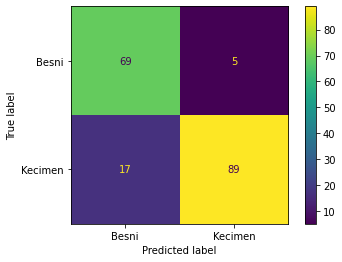

WKNN Confusion Matrix 
Accuracy:  0.8777777777777778


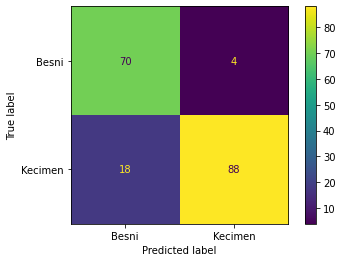

In [195]:
print("SVC Confusion Matrix", "\n" "Accuracy: ", SVCaccuracy)
vals = data[target].unique() 
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=clf.classes_)
disp.plot()
plt.show()

print("WKNN Confusion Matrix", "\n"  "Accuracy: ", wKNNaccuracy)
vals = data[target].unique() 
conf_mat = metrics.confusion_matrix(test_sln, wKNNPred, labels=vals)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=wKNN.classes_)
disp.plot()
plt.show()

0.8722222222222222


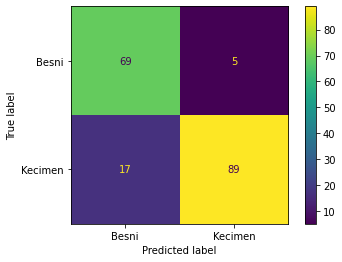

In [239]:
from sklearn.decomposition import PCA
extract = PCA(n_components=7, whiten=True)
extract.fit(train_data_normalized)
train_transform=extract.transform(train_data_normalized)
test_transform=extract.transform(test_data_normalized)

svc = SVC(kernel = 'sigmoid', C=.09)
svc.fit(train_transform, train_sln)
pred2=svc.predict(test_transform)
print(metrics.accuracy_score(pred2, test_sln))

vals = data[target].unique() 
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=svc.classes_)
disp.plot()
plt.show()

0.8333333333333334


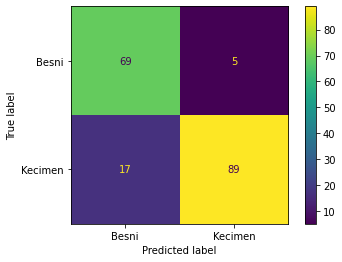

In [241]:
extract = PCA(n_components=7, whiten=True)
extract.fit(train_data_normalized)
train_transform=extract.transform(train_data_normalized)
test_transform=extract.transform(test_data_normalized)

w = sklearn.neighbors.KNeighborsClassifier(n_neighbors=185, weights = "distance")
w.fit(train_transform, train_sln)
pred3=w.predict(test_transform)
print(metrics.accuracy_score(pred3, test_sln))

vals = data[target].unique() 
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=svc.classes_)
disp.plot()
plt.show()

In [203]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [207]:
Kecimen = data.loc[data.Class=='Kecimen', ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity','ConvexArea', 'Extent', 'Perimeter']]
Besni = data.loc[data.Class == 'Besni', ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity','ConvexArea', 'Extent', 'Perimeter']]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
450,137583,649.541485,273.260282,0.907201,142650,0.731638,1590.354
451,117592,533.292856,288.558319,0.840966,123587,0.730068,1432.006
452,95546,487.178282,251.960243,0.855875,99166,0.722782,1276.807
453,96582,446.705203,278.325498,0.782172,100113,0.706598,1216.979
454,61409,403.701295,209.365889,0.855007,67286,0.597393,1083.477
...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548


In [232]:
Area = data.groupby(['Class'])['Area'].mean()
MajorAxisLength = data.groupby(['Class'])['MajorAxisLength'].mean()
MinorAxisLength = data.groupby(['Class'])['MinorAxisLength'].mean()
Eccentricity = data.groupby(['Class'])['Eccentricity'].mean()
Extent = data.groupby(['Class'])['Extent'].mean()
Perimeter = data.groupby(['Class'])['Perimeter'].mean()
print("Area Mean: ", "\n",  Area, "\n", "Major Length: ", "\n", MajorAxisLength, "\n" "Minor Length: ", "\n", MinorAxisLength, "\n" "Eccentricity", "\n", Eccentricity, 
      "\n" "Extent", "\n", Extent, "\n" "Perimeter", "\n", Perimeter)

Area Mean:  
 Class
Besni      112194.788889
Kecimen     63413.466667
Name: Area, dtype: float64 
 Major Length:  
 Class
Besni      509.000652
Kecimen    352.859249
Name: MajorAxisLength, dtype: float64 
Minor Length:  
 Class
Besni      279.623674
Kecimen    229.352592
Name: MinorAxisLength, dtype: float64 
Eccentricity 
 Class
Besni      0.821125
Kecimen    0.741960
Name: Eccentricity, dtype: float64 
Extent 
 Class
Besni      0.691242
Kecimen    0.707774
Name: Extent, dtype: float64 
Perimeter 
 Class
Besni      1348.127036
Kecimen     983.686236
Name: Perimeter, dtype: float64


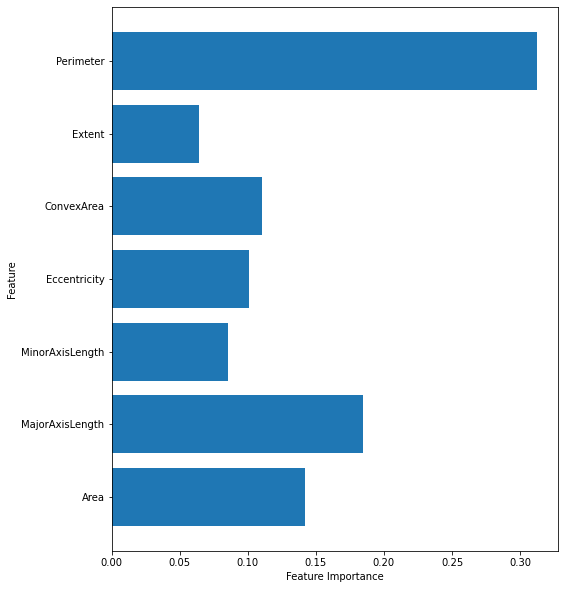

In [234]:
index = range(len(predictor)) #creates a list of numbers the right size to use as the index

plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index,forest.feature_importances_,height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictor) #put the feature names at the y tick marks
plt.xlabel("Feature Importance")
plt.show()

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean. \\
Experiment 1) Overall, all the models performed significantly better than just randomly guessing. Weighted KNN and SVC performed the best with about an 88% accuracy. Since this is just dealing with raisins and both are safe to consume, there is no matter of life and death by categorizing a raisin wrong so I would say it would not matter which model, SVC or Weighted KNN you were to use for predictions. One thing I did find interesting is that even though SVC and Weighted KNN had the same accuracy, SVC did better with classifying the Kecimen type and Weighted KNN did better predicting the Besni type. In regards to the other models, I would not say they are necessarily bad models because they all had an accuracys in the .80s. However, I would probably not recommend using Decision Tree for this dataset because it produced the lowest accuracy, ~.81 while the rest were ~.85-.88. I think the Decision Tree model peformed the worse because this was a dataset that did not have a lot of predictor variables and many of the predictor variables had very similar values for both types of raisins. I think this contributed to a lower accuracy compared to others because there were not very many nodes that could be made so there was probably more bias in the Decision Tree model compared to the others resulting in more missclassfication. I am hypothesising that the highest accuracy a Machine Model would be able to predict for this dataset is a ~.88. I think this because for the Weighted KNN and SVC, no matter what I passed in it never produced a better accuracy then the ~.88. Since two models got the exact same highest accuracy this might be indicitive that this will be the highest accuracy you will ever get. Finally, the last piece of evidence I have for the hypothesis is that the accuracy did not increase for either model after I ran PCA on both of them. \\
Experiment 2) By just looking at the data, I assumed that area, permiter, and length would be the biggest factors in the prediction of what type of raisin it was. After running averages on all columns based on type, I was predicting that area and major length would be the most important features for predicition since they both had a wide gap between classes. After running the most important feature graph I was suprised to see how much more important perimeter was compared to everything else. I was suprised to see how low importance area had espeially since area and perimeter are usually connected. I was assuming that area would be the most important feature based on the averages so the graph was suprising to me. 

Bumps in the Road \\
I did not really have a ton of problems with this project, I was just very time consuming to write all the code and run all the models. The one challenge I did face was the implementation of the accuracy graph based on differing C values for the SVC. I tried implementing it similar to how I did it for Decision Tree but it did not work. I tried multiple things and then looked a long time at the documentation in Sklearn to figure out what was going on. After about an hour, I realized that I was passing in the wrong thing for plotting the graph so that was why I was not receving a plot. Another problem I faced a lot was spelling. I am a very bad speller which is not great for computer science, there would be times I was trying to import things, print things, or call them in a function and I could not figure out why I was getting errors. Every single time it was because I spelt something wrong. Most of the time I caught it right away but there was a few times that I tried changing the code before I realized it was just a spelling error. 